In [ ]:
!pip install intake intake-esm xarray zarr gcsfs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.2 MB/s eta 0:00:00


In [ ]:
import intake
import xarray as xr

# Load the Pangeo CMIP6 cloud data catalog
col_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_catalog(col_url)

# See what experiments/models are available
print(list(col))

[]


In [ ]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [ ]:
import intake

col_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(col_url)

col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [ ]:
col.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


In [ ]:
col.df['variable_id'].unique()

array(['ps', 'rsds', 'rlus', 'rlds', 'psl', 'hurs', 'huss', 'hus', 'hfss',
       'rsus', 'evspsbl', 'rsdt', 'hfls', 'rsut', 'clt', 'zg', 'ts', 'va',
       'uas', 'vas', 'tas', 'ta', 'ua', 'pr', 'tauv', 'prc', 'tauu',
       'rsutcs', 'wtem', 'vtem', 'prw', 'prsn', 'rlut', 'rlutcs',
       'tasmax', 'tasmin', 'emidust', 'emiss', 'mmrbc', 'mmrdust',
       'mmroa', 'mmrpm2p5', 'o3', 'mmrsoa', 'mmrss', 'od550lt1aer', 'oh',
       'emidms', 'mmrso4', 'cltc', 'ptp', 'airmass', 'ccb', 'cdnc', 'toz',
       'so2', 'rsutcsaf', 'wa', 'rlutcsaf', 'rlutaf', 'od870aer',
       'od550aer', 'abs550aer', 'rsutaf', 'snw', 'mrsos', 'mrso', 'mrro',
       'areacella', 'siconc', 'basin', 'mrros', 'mlotst', 'clivi', 'hur',
       'sfdsi', 'co2mass', 'rsntds', 'masso', 'soga', 'evspsblsoi', 'sos',
       'sosga', 'tauuo', 'sfcWind', 'clwvi', 'vo', 'vmo', 'uo', 'umo',
       'tosga', 'tauvo', 'tos', 'thetao', 'thetaoga', 'pbo', 'thkcello',
       'orog', 'volo', 'wfo', 'cllcalipso', 'evspsblpot', 'wap', '

In [ ]:
query = dict(
    experiment_id=["historical"],
    variable_id=["tas"],
    source_id=["CESM2"]
)

cat = col.search(**query)
cat

,unique
activity_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,11
table_id,2
variable_id,1
grid_label,1
zstore,22
dcpp_init_year,0


In [ ]:
# Load the dataset with anonymous access
dset_dict = cat.to_dataset_dict(zarr_kwargs={"consolidated": True},
                                storage_options={"token": "anon"})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [ ]:
# Pick the dataset
ds = list(dset_dict.values())[0]

(array([  2448.,  42658.,  71421.,  36295.,  35466.,  71768.,  81231.,
         81648., 176334.,   8987.]),
 array([224.70500183, 233.23529053, 241.76557922, 250.29586792,
        258.82617188, 267.35644531, 275.88674927, 284.41705322,
        292.94732666, 301.4776001 , 310.00790405]),
 <BarContainer object of 10 artists>)

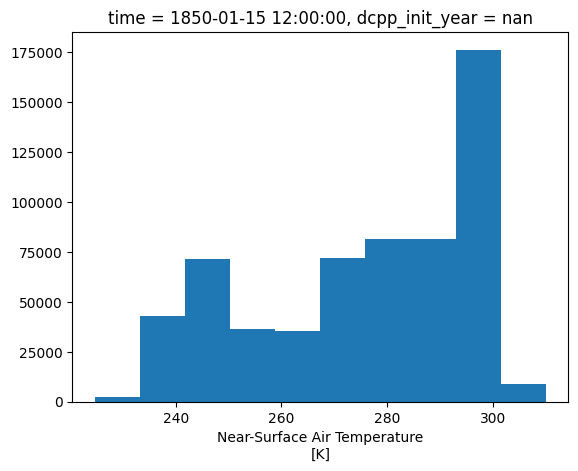

In [ ]:
# Quick plot
ds['tas'].isel(time=0).plot()